# Population Growth Trends:-

## INFO6105 - Final Project
### Team members - Pranav Prakash, Kavinraj Duraisamy and Shashikar Antony Raj

## Introduction

The global population has always been a topic of intense discussion. For decades, we've heard concerns about overpopulation, resource scarcity, and a world struggling to accommodate the rising number of people. But what if we told you the population might actually be **declining** in the future? Shocking, right?

<img src="./images/World-Population-Growth.png" alt="Population Growth Chart" title="Population Growth Over Time" width="600" />

Today, we will challenge this assumption with the power of **data science**. Together, we’ll explore historical trends, analyze the data, and build a model to predict population growth (or decline!) for the coming years.

---

## Our Hypothesis

We believe that the population will be **reducing**, contrary to what most people think. If this turns out to be true, the implications could be profound and unexpected.

But let’s have some fun:  
If the population is really declining, what’s your favorite reason for it?  
*Mine would be a zombie apocalypse because, well, I’m a video game fanatic!*

<img src="./images/zombie.jpg" alt="Zombie Apocalypse" title="Zombie Apocalypse" width="500" />


---

## But What’s the Real Reason?

Is it climate change? Wars? Pandemics?  
**No. It’s something much simpler. It’s the Babies.**

<img src="./images/funny-baby.jpg" alt="Zombie Apocalypse" title="Zombie Apocalypse" width="600" />

The fertility rate has been steadily dropping across the globe. Combined with rising median ages and life expectancy, this shift could drastically reshape our population trends.

[Singapore Population Crisis](https://www.cnbc.com/2023/09/18/singapores-birth-rate-is-falling-and-throwing-money-at-the-problem-wont-solve-it-.html)




## What’s Our Plan?

We will:
1. Compare **Fertility Rate**, **Median Age**, and **Life Expectancy** with **Population** over the years.
2. Try out different models to find the best fit with the actual population.
3. Build a predictive model to forecast the population growth for the next 60 years.

Let’s dive in and uncover the truth!


## Dataset Sources

1. **Life Expectancy**  
   - **Data Source:** [Life Expectancy](https://ourworldindata.org/life-expectancy)  
   - **Citation:** Saloni Dattani, Lucas Rodés-Guirao, Hannah Ritchie, Esteban Ortiz-Ospina and Max Roser (2023) - “Life Expectancy” Published online at OurWorldinData.org.
2. **Median Age Vs BirthRate**
   - **Data Source:** [Median Age Vs BirthRate](https://ourworldindata.org/grapher/median-age-vs-births-per-woman)
   - **Citation:** [UN, World Population Prospects (2024)](https://population.un.org/wpp/Download/Standard/MostUsed/)


### Importing reequired libraries

In [10]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit

## Life Expectancy dataset Preprocessing

In [11]:
life_expectancy = pd.read_csv('./data/life-expectancy.csv')
life_expectancy.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


In [12]:
life_expectancy.shape

(21565, 4)

In [13]:
life_expectancy.describe()

,Year,Period life expectancy at birth - Sex: total - Age: 0
count,21565.000000,21565.000000
mean,1976.992812,61.942238
std,38.461606,12.925909
min,1543.000000,10.989100
25%,1962.000000,52.703000
50%,1982.000000,64.479900
75%,2003.000000,71.978900
max,2023.000000,86.372400


In [14]:
# percentage of null values
round((life_expectancy.isnull().sum()/life_expectancy.shape[0])*100,2)

Entity                                                   0.00
Code                                                     9.07
Year                                                     0.00
Period life expectancy at birth - Sex: total - Age: 0    0.00
dtype: float64

## Life Expectancy Dataset cleaning

In [15]:
life_expectancy = life_expectancy.drop(columns=['Code'], axis=1)
life_expectancy = life_expectancy.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'Life Expectancy'})
life_expectancy = life_expectancy.drop_duplicates()
life_expectancy.head()


,Entity,Year,Life Expectancy
0,Afghanistan,1950,28.1563
1,Afghanistan,1951,28.5836
2,Afghanistan,1952,29.0138
3,Afghanistan,1953,29.4521
4,Afghanistan,1954,29.6975


## Birth Factors dataset Preprocessing

In [16]:
birth_factors = pd.read_csv('./data/median-age-vs-births-per-woman.csv')
birth_factors.head()

,Entity,Code,Year,Median age - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: estimates,World regions according to OWID
0,Afghanistan,AFG,1950,18.395,7.248,7776182.0,NaN
1,Afghanistan,AFG,1951,18.370,7.260,7879343.0,NaN
2,Afghanistan,AFG,1952,18.333,7.260,7987783.0,NaN
3,Afghanistan,AFG,1953,18.289,7.266,8096703.0,NaN
4,Afghanistan,AFG,1954,18.239,7.254,8207953.0,NaN


In [17]:
birth_factors.shape

(18978, 7)

In [18]:
birth_factors.describe()

,Year,Median age - Sex: all - Age: all - Variant: estimates,Fertility rate - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: estimates
count,18978.000000,18722.000000,18722.000000,1.894400e+04
mean,1986.565392,23.891321,3.961614,1.306784e+08
std,21.397178,8.032117,2.005870,6.009285e+08
min,1950.000000,12.617000,0.662000,5.010000e+02
25%,1968.000000,17.294000,2.131250,2.858625e+05
50%,1987.000000,20.983000,3.521000,3.885508e+06
75%,2005.000000,29.625750,5.899750,1.746007e+07
max,2023.000000,62.417000,8.864000,8.091735e+09


In [19]:
# percentage of null values
round((birth_factors.isnull().sum()/birth_factors.shape[0])*100,2)

Entity                                                        0.00
Code                                                          7.09
Year                                                          0.00
Median age - Sex: all - Age: all - Variant: estimates         1.35
Fertility rate - Sex: all - Age: all - Variant: estimates     1.35
Population - Sex: all - Age: all - Variant: estimates         0.18
World regions according to OWID                              98.57
dtype: float64

## Birth Factors Data Cleaning

In [20]:
birth_factors = birth_factors.drop(columns=['Code','World regions according to OWID'], axis=1)
birth_factors = birth_factors.rename(columns={'Median age - Sex: all - Age: all - Variant: estimates': 'Median age', 'Fertility rate - Sex: all - Age: all - Variant: estimates': 'Fertility rate','Population - Sex: all - Age: all - Variant: estimates':'Population'})
birth_factors = birth_factors.drop_duplicates()
birth_factors.head()



,Entity,Year,Median age,Fertility rate,Population
0,Afghanistan,1950,18.395,7.248,7776182.0
1,Afghanistan,1951,18.370,7.260,7879343.0
2,Afghanistan,1952,18.333,7.260,7987783.0
3,Afghanistan,1953,18.289,7.266,8096703.0
4,Afghanistan,1954,18.239,7.254,8207953.0


In [21]:
birth_factors = birth_factors.bfill()

In [22]:
birth_factors.describe()

,Year,Median age,Fertility rate,Population
count,18978.000000,18978.000000,18978.000000,1.897800e+04
mean,1986.565392,23.863365,3.978694,1.304824e+08
std,21.397178,8.012031,2.012682,6.004205e+08
min,1950.000000,12.617000,0.662000,5.010000e+02
25%,1968.000000,17.281500,2.129000,2.853488e+05
50%,1987.000000,20.936000,3.542000,3.882662e+06
75%,2005.000000,29.657250,5.936000,1.742059e+07
max,2023.000000,62.417000,8.864000,8.091735e+09


In [23]:
finalData = pd.merge(life_expectancy, birth_factors, on=['Entity', 'Year'])

finalData.head()

,Entity,Year,Life Expectancy,Median age,Fertility rate,Population
0,Afghanistan,1950,28.1563,18.395,7.248,7776182.0
1,Afghanistan,1951,28.5836,18.370,7.260,7879343.0
2,Afghanistan,1952,29.0138,18.333,7.260,7987783.0
3,Afghanistan,1953,29.4521,18.289,7.266,8096703.0
4,Afghanistan,1954,29.6975,18.239,7.254,8207953.0


# Data Modelling

### Using World Data

In [24]:
dataWorld = finalData[finalData['Entity'].str.contains('World', case=False, na=False)]
dataWorld = dataWorld.reset_index(drop=True)
dataWorld.head()

,Entity,Year,Life Expectancy,Median age,Fertility rate,Population
0,World,1950,46.3944,22.159,4.852,2.493093e+09
1,World,1951,47.1259,22.123,4.816,2.536927e+09
2,World,1952,48.2183,22.074,5.001,2.584086e+09
3,World,1953,48.8090,22.011,4.922,2.634106e+09
4,World,1954,49.6514,21.937,4.998,2.685895e+09


In [25]:
dataWorld.shape

(74, 6)

In [26]:
dataWorld.describe()

,Year,Life Expectancy,Median age,Fertility rate,Population
count,74.000000,74.000000,74.000000,74.000000,7.400000e+01
mean,1986.500000,61.648511,23.727135,3.607284,5.103775e+09
std,21.505813,7.726191,3.013889,1.001674,1.722649e+09
min,1950.000000,46.394400,20.308000,2.251000,2.493093e+09
25%,1968.250000,55.713550,21.446000,2.634250,3.563763e+09
50%,1986.500000,62.955300,22.290500,3.490000,5.003910e+09
75%,2004.750000,68.041600,26.075000,4.729000,6.566072e+09
max,2023.000000,73.169400,30.364000,5.308000,8.091735e+09


## Exploratory Data Analysis

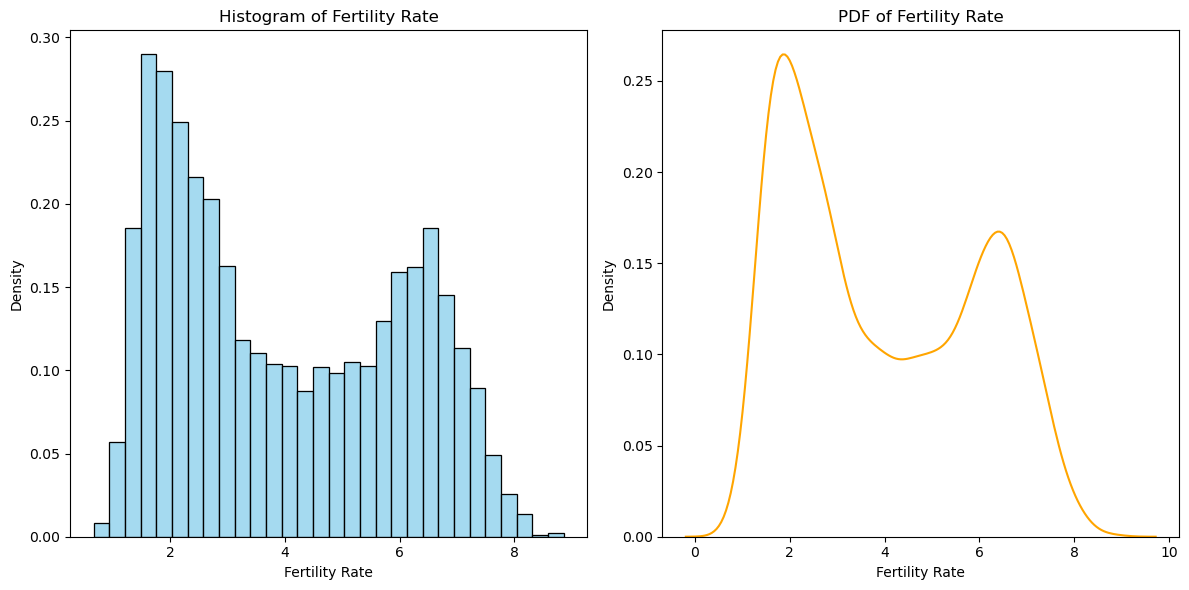

In [27]:
# Fertility Rate
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(finalData['Fertility rate'], kde=False, bins=30, color='skyblue', stat='density', ax=axes[0])
axes[0].set_title('Histogram of Fertility Rate')
axes[0].set_xlabel('Fertility Rate')
axes[0].set_ylabel('Density')

sns.kdeplot(finalData['Fertility rate'], color='orange', ax=axes[1])
axes[1].set_title('PDF of Fertility Rate')
axes[1].set_xlabel('Fertility Rate')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Inference from the Plots

The image displays two plots of fertility rate data: a histogram and a probability density function (PDF).

### 1. Histogram of Fertility Rate:
- The histogram shows the distribution of fertility rates in bins. It appears that the fertility rates are concentrated between 2 and 6, with higher frequencies around 5–6 and smaller frequencies at both extremes (low and high fertility rates).

### 2. PDF of Fertility Rate:
- The PDF curve represents the smoothened probability distribution of fertility rates. It shows two peaks: one around 2–3 and another around 6, indicating that these are the most common fertility rates in the data. The density sharply decreases on either side, suggesting less frequent occurrences for very low or very high fertility rates.

### **Inference**:
- The data suggests a bimodal distribution of fertility rates, with two prominent peaks. This could imply two distinct groups or trends in fertility rates, possibly across different regions or demographic groups. It also indicates that fertility rates are more likely to be around 2–3 and 5–6.


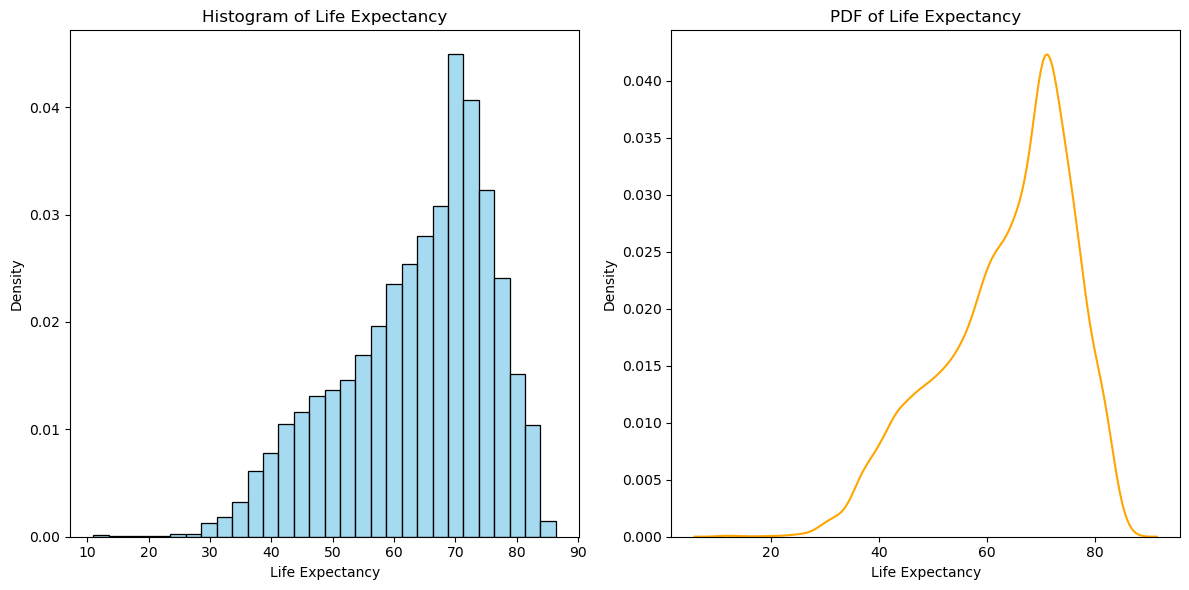

In [28]:
# Life Expectancy
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(finalData['Life Expectancy'], kde=False, bins=30, color='skyblue', stat='density', ax=axes[0])
axes[0].set_title('Histogram of Life Expectancy')
axes[0].set_xlabel('Life Expectancy')
axes[0].set_ylabel('Density')

sns.kdeplot(finalData['Life Expectancy'], color='orange', ax=axes[1])
axes[1].set_title('PDF of Life Expectancy')
axes[1].set_xlabel('Life Expectancy')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Inference from the Plots

The image shows two plots of life expectancy data: a histogram and a probability density function (PDF).

### 1. Histogram of Life Expectancy:
- The histogram displays the distribution of life expectancy across a range of values, with the density of occurrences increasing in the range of 60–75 years. The distribution is positively skewed, with fewer occurrences at both the lower and upper ends of the life expectancy scale (i.e., younger and older age ranges).

### 2. PDF of Life Expectancy:
- The PDF curve represents the smoothened probability distribution of life expectancy. It shows a right-skewed distribution, peaking around the mid-70s, with a gradual decline as life expectancy increases. The curve suggests that most values are concentrated between 60 and 80 years.

### **Inference**:
- The data suggests that life expectancy tends to be clustered around 60–80 years, with fewer instances of extremely low or high life expectancy. The distribution is unimodal with a peak around 70 years, indicating a central tendency in life expectancy values.


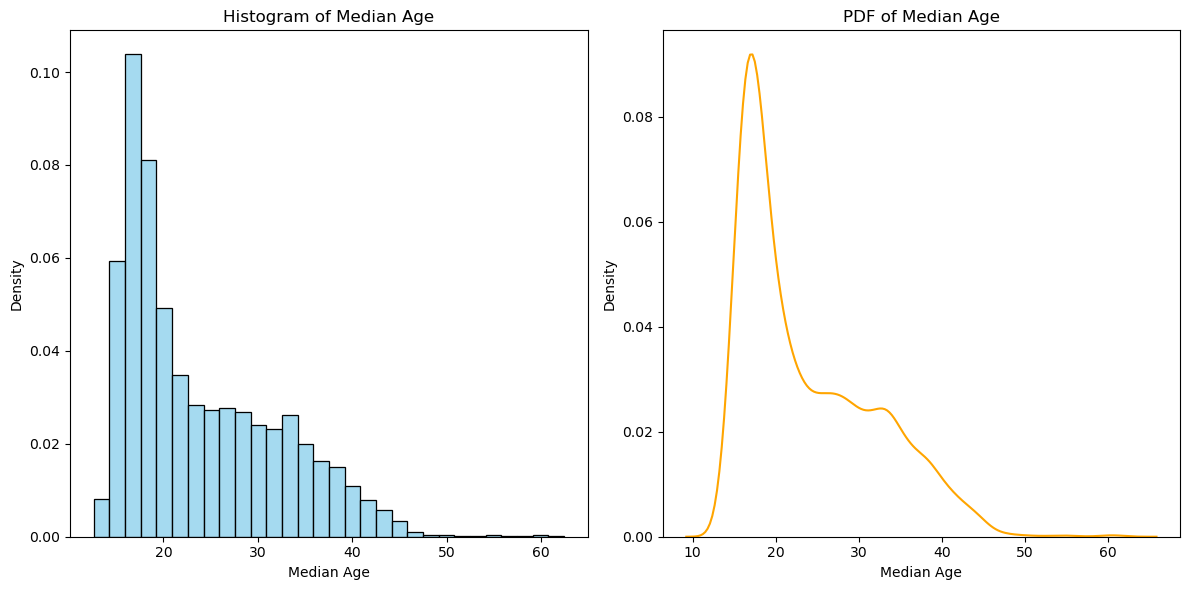

In [29]:
# Median Age
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(finalData['Median age'], kde=False, bins=30, color='skyblue', stat='density', ax=axes[0])
axes[0].set_title('Histogram of Median Age')
axes[0].set_xlabel('Median Age')
axes[0].set_ylabel('Density')

sns.kdeplot(finalData['Median age'], color='orange', ax=axes[1])
axes[1].set_title('PDF of Median Age')
axes[1].set_xlabel('Median Age')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Inference from the Plots

The image displays two plots of median age data: a histogram and a probability density function (PDF).

### 1. Histogram of Median Age:
- The histogram shows the distribution of median age across a range of values, with the highest density occurring in the lower range (around 20 to 25 years). The distribution appears to be heavily skewed to the right, with fewer occurrences as median age increases.

### 2. PDF of Median Age:
- The PDF curve represents the smoothed probability distribution of median age. It has a sharp peak around the lower values of median age (10–20 years), with a rapid drop-off as median age increases, suggesting that the data is concentrated in the younger age ranges.

### **Inference**:
- The data suggests that the majority of the observations fall within the younger age group, specifically between 10 and 30 years. The distribution is right-skewed, meaning that while most values are lower, there are some instances with higher median ages, but these are relatively rare.


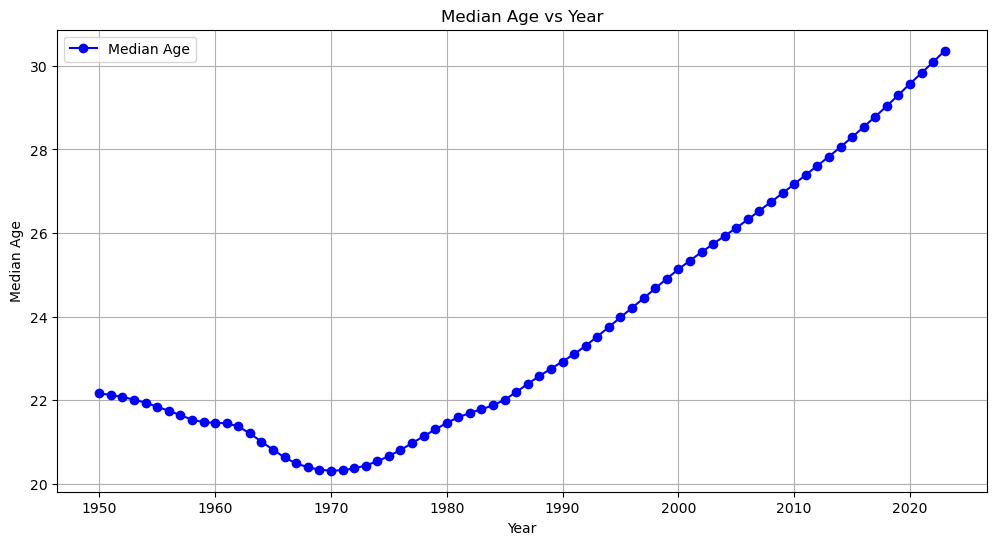

In [30]:
# Line plot for Median Age vs Year
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Median age'], marker='o', color='blue', label='Median Age')
plt.title('Median Age vs Year')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.grid(True)
plt.legend()
plt.show()

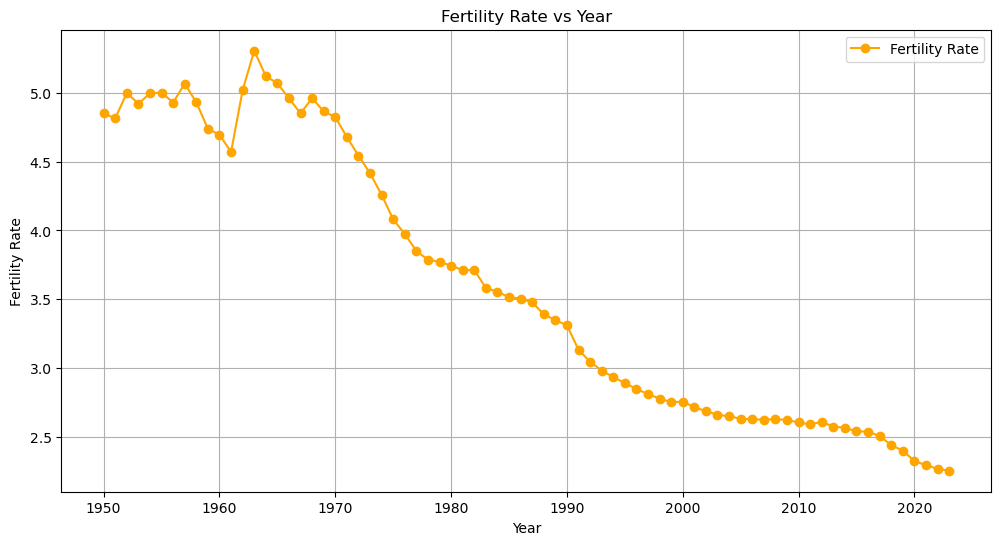

In [31]:
# Line plot for Fertility Rate vs Year
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Fertility rate'], marker='o', color='orange', label='Fertility Rate')
plt.title('Fertility Rate vs Year')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.grid(True)
plt.legend()
plt.show()

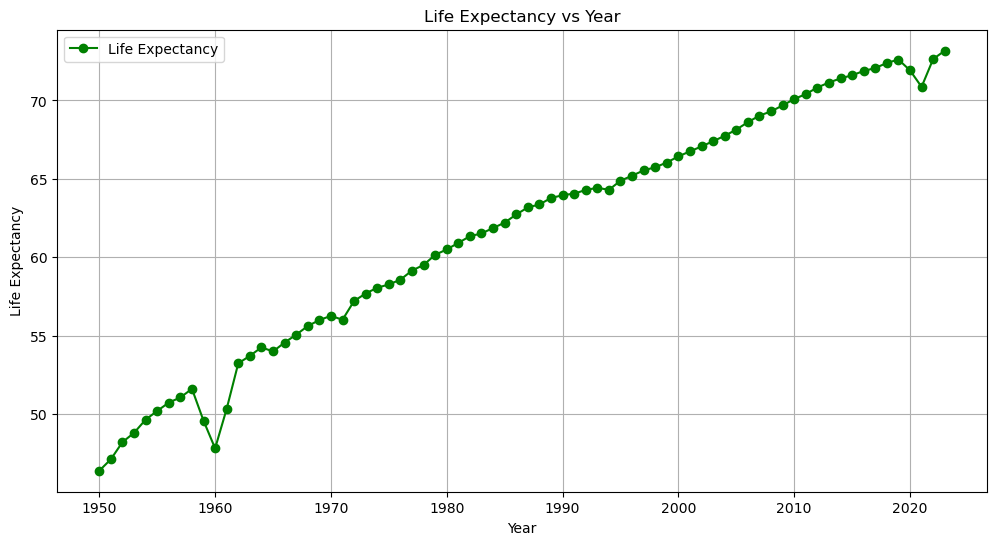

In [32]:
# Line plot for Life Expectancy vs Year
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Life Expectancy'], marker='o', color='green', label='Life Expectancy')
plt.title('Life Expectancy vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()

### Building Different Models

In [33]:
# Independent variables (features) and target variable
X = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]
y = dataWorld['Population']

In [34]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mse_scores = {}
X_test

,Life Expectancy,Median age,Fertility rate
4,49.6514,21.937,4.998
63,71.1417,27.830,2.572
18,55.6181,20.393,4.963
0,46.3944,22.159,4.852
28,59.5129,21.132,3.787
73,73.1694,30.364,2.251
10,47.8198,21.455,4.696
34,61.8663,21.874,3.553
12,53.2416,21.369,5.022
55,68.1405,26.123,2.630


### Using Linear Regression

In [35]:
# Fit the linear regression model
model_linear = sm.OLS(y_train,X_train).fit()
# model.fit(X_train, y_train)

# Make predictions
y_pred = model_linear.predict(X_test)

In [36]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Population   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.551e+04
Date:                Tue, 24 Dec 2024   Prob (F-statistic):                    1.05e-81
Time:                        18:11:58   Log-Likelihood:                         -1208.4
No. Observations:                  59   AIC:                                      2423.
Df Residuals:                      56   BIC:                                      2429.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Life Expectancy  7.382e+07   6.31e+06     11.701      0.000    6.12e+07    8.65e+07
Median age       1.388e+08   1.64e+07      8.437      0.000    1.06e+08    1.72e+08
Fertility rate  -7.563e+08   1.88e+07    -40.326      0.000   -7.94e+08   -7.19e+08
==============================================================================
Omnibus:                        9.928   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.453
Skew:                           0.428   Prob(JB):                        0.108
Kurtosis:                       1.962   Cond. No.                         50.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### p-value Analysis:
All predictors (Life Expectancy, Median Age, and Fertility Rate) have
𝑝
< 0.000 >, indicating strong statistical significance. This means there is overwhelming evidence to suggest that these variables have a meaningful impact on the dependent variable.

### Inference for Durbin-Watson: 2.011:
A value of 2.011 is very close to 2, which suggests that there is no significant autocorrelation in the residuals of your regression model. This means that the residuals are independent of each other, and there are no apparent patterns over time or observations.

Conclusion: Based on this result, you can infer that the assumptions of no autocorrelation are satisfied, and the model does not suffer from serial correlation issues. This is a good indicator that the model's residuals are random and not influenced by previous residuals.



### Inference for Skew:	0.428:

The skew value of 0.428 indicates a mild positive skew in the residuals, meaning the distribution has a longer right tail. This suggests that the residuals are slightly more likely to be above the mean. A skewness value between -0.5 and 0.5 is generally considered acceptable, so this level of skew is not concerning.

Additionally, the **Prob(JB)** value of 0.108 suggests that the residuals do not significantly deviate from normality. Overall, the mild positive skew is acceptable and does not pose a major issue for the model.



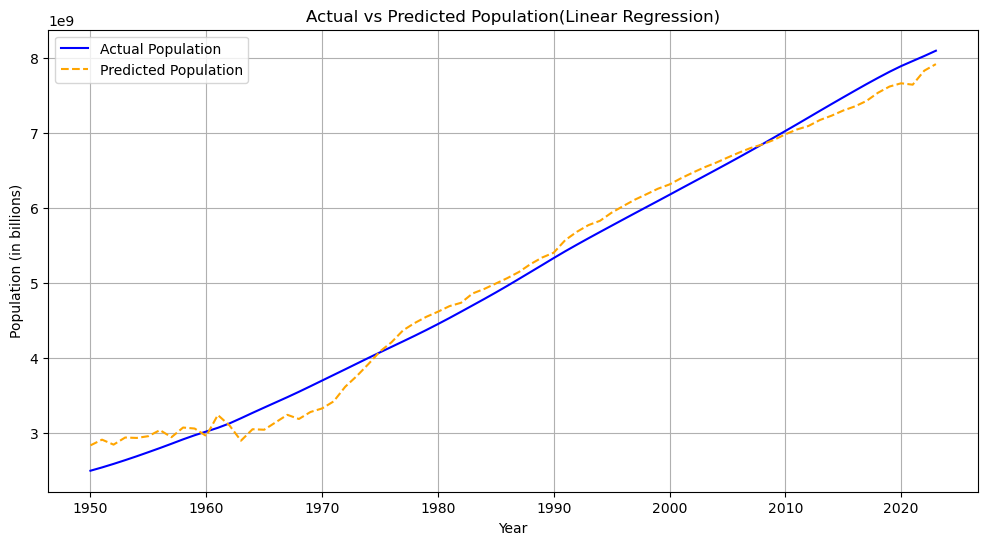

In [37]:
X = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]
dataWorld['Predicted Population'] = model_linear.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Population'], label='Actual Population', color='blue')
plt.plot(dataWorld['Year'], dataWorld['Predicted Population'], label='Predicted Population', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population(Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_scores["Linear"]=mse

print(f"Mean Absolute Error for OLS (MAE): {mae}")
print(f"Mean Squared Error for OLS (MSE): {mse}")
print(f"R-squared (R²) for OLS: {r2}")

Mean Absolute Error for OLS (MAE): 168307669.41620582
Mean Squared Error for OLS (MSE): 3.661188187597609e+16
R-squared (R²) for OLS: 0.9896631382940828


### Using ElasticNet Regression

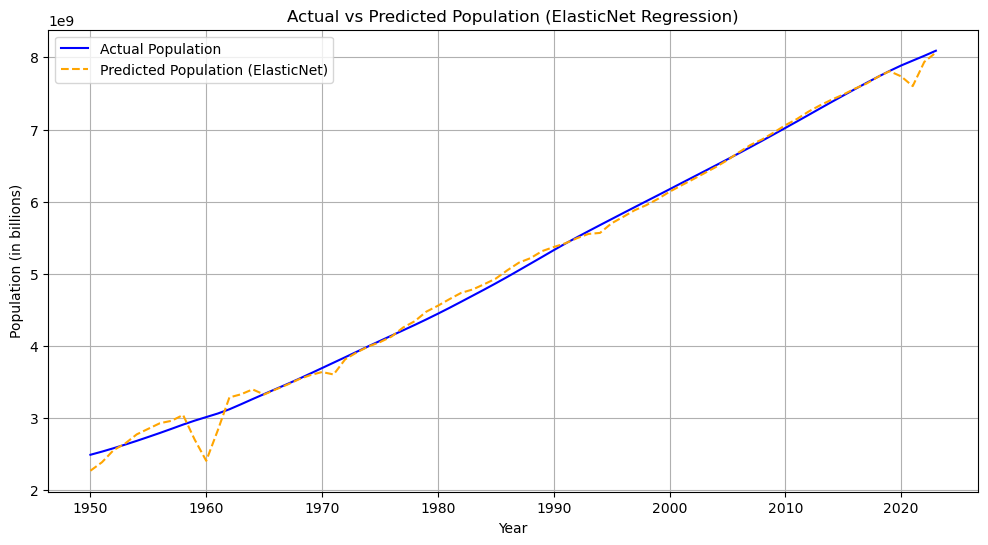

In [39]:
# Independent variables (features) and target variable for ElasticNet regression
X_elastic = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]  # Features
y_elastic = dataWorld['Population']  # Target variable

# Split into training and testing sets for ElasticNet regression
X_train_elastic, X_test_elastic, y_train_elastic, y_test_elastic = train_test_split(X_elastic, y_elastic, test_size=0.2, random_state=42)

# Fit the ElasticNet model
model_elastic = ElasticNet(alpha=1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls L1 vs L2 penalty
model_elastic.fit(X_train_elastic, y_train_elastic)

# Make predictions
y_pred_elastic = model_elastic.predict(X_test_elastic)

# Evaluate the model
mae_elastic = mean_absolute_error(y_test_elastic, y_pred_elastic)
mse_elastic = mean_squared_error(y_test_elastic, y_pred_elastic)
r2_elastic = r2_score(y_test_elastic, y_pred_elastic)

# Add predicted population to the dataset
dataWorld['Predicted Population ElasticNet'] = model_elastic.predict(X_elastic)

# Plot actual vs predicted populations over time
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Population'], label='Actual Population', color='blue')
plt.plot(dataWorld['Year'], dataWorld['Predicted Population ElasticNet'], label='Predicted Population (ElasticNet)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population (ElasticNet Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
print(f"Mean Absolute Error for Elasticnet (MAE): {mae_elastic}")
print(f"Mean Squared Error  for Elasticnet (MSE): {mse_elastic}")
print(f"R-squared  for Elasticnet (R²): {r2_elastic}")
mse_scores["ElasticNet"]=mse_elastic

Mean Absolute Error for Elasticnet (MAE): 124019768.03000577
Mean Squared Error  for Elasticnet (MSE): 3.7444708586990216e+16
R-squared  for Elasticnet (R²): 0.9894280011174168


### LARS Regression

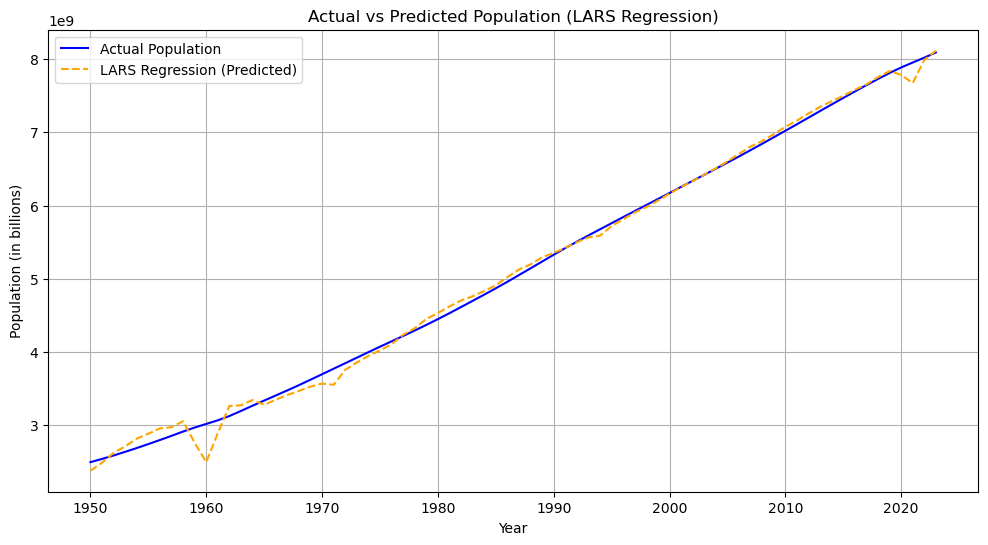

In [41]:
# Independent variables (features) and target variable for LARS regression
X_lars = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]  # Features
y_lars = dataWorld['Population']  # Target variable

# Split into training and testing sets for LARS regression
X_train_lars, X_test_lars, y_train_lars, y_test_lars = train_test_split(X_lars, y_lars, test_size=0.2, random_state=42)

# Fit the LARS model
model_lars = Lars()  # LARS regression
model_lars.fit(X_train_lars, y_train_lars)

# Make predictions
y_pred_lars = model_lars.predict(X_test_lars)

# Evaluate the model
mae_lars = mean_absolute_error(y_test_lars, y_pred_lars)
mse_lars = mean_squared_error(y_test_lars, y_pred_lars)
r2_lars = r2_score(y_test_lars, y_pred_lars)

# Add predicted population to the dataset
dataWorld['Predicted Population LARS'] = model_lars.predict(X_lars)

# Plot actual vs predicted populations over time
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Population'], label='Actual Population', color='blue')
plt.plot(dataWorld['Year'], dataWorld['Predicted Population LARS'], label='LARS Regression (Predicted)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population (LARS Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
print(f"Mean Absolute Error (MAE) for Lars: {mae_lars}")
print(f"Mean Squared Error (MSE)for Lars: {mse_lars}")
print(f"R-squared (R²) for Lars: {r2_lars}")
mse_scores["Lars"]=mse_lars

Mean Absolute Error (MAE) for Lars: 111358166.4214714
Mean Squared Error (MSE)for Lars: 2.728127938888548e+16
R-squared (R²) for Lars: 0.9922975056797492


### Using Lasso Regression

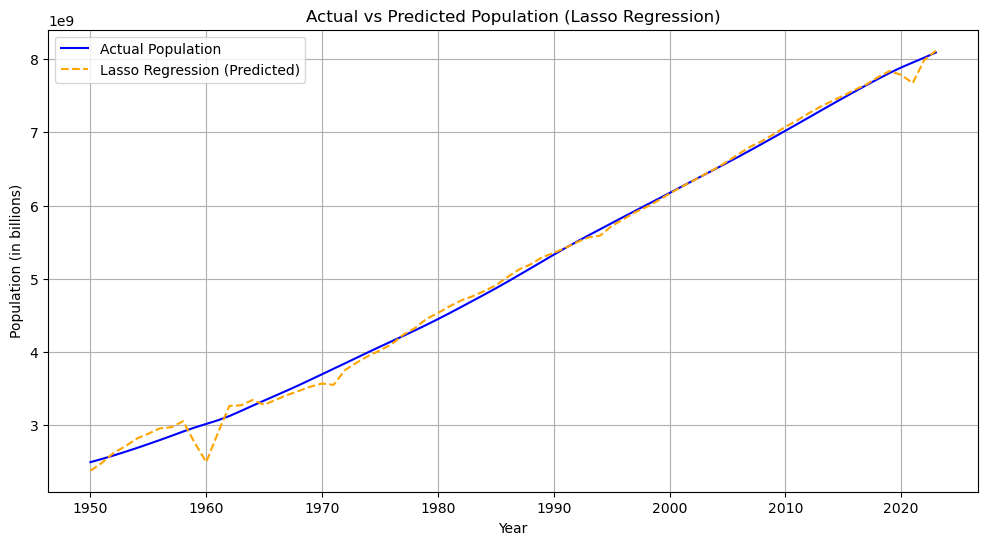

In [43]:
# Independent variables (features) and target variable for Lasso regression
X_lasso = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]  # Features
y_lasso = dataWorld['Population']  # Target variable

# Split into training and testing sets for Lasso regression
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

# Fit the Lasso model
alpha = 0.1  # Regularization strength
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_train_lasso, y_train_lasso)

# Make predictions
y_pred_lasso = model_lasso.predict(X_test_lasso)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

# Add predicted population to the dataset
dataWorld['Predicted Population Lasso'] = model_lasso.predict(X_lasso)

# Plot actual vs predicted populations over time
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Population'], label='Actual Population', color='blue')
plt.plot(dataWorld['Year'], dataWorld['Predicted Population Lasso'], label='Lasso Regression (Predicted)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population (Lasso Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
print(f"Mean Absolute Error (MAE) for Lasso: {mae_lasso}")
print(f"Mean Squared Error (MSE) for Lasso: {mse_lasso}")
print(f"R-squared (R²) for Lasso: {r2_lasso}")
mse_scores["Lasso"]=mse_lasso

Mean Absolute Error (MAE) for Lasso: 111358166.63240534
Mean Squared Error (MSE) for Lasso: 2.728127950154707e+16
R-squared (R²) for Lasso: 0.9922975056479407


## Using Rigg regression

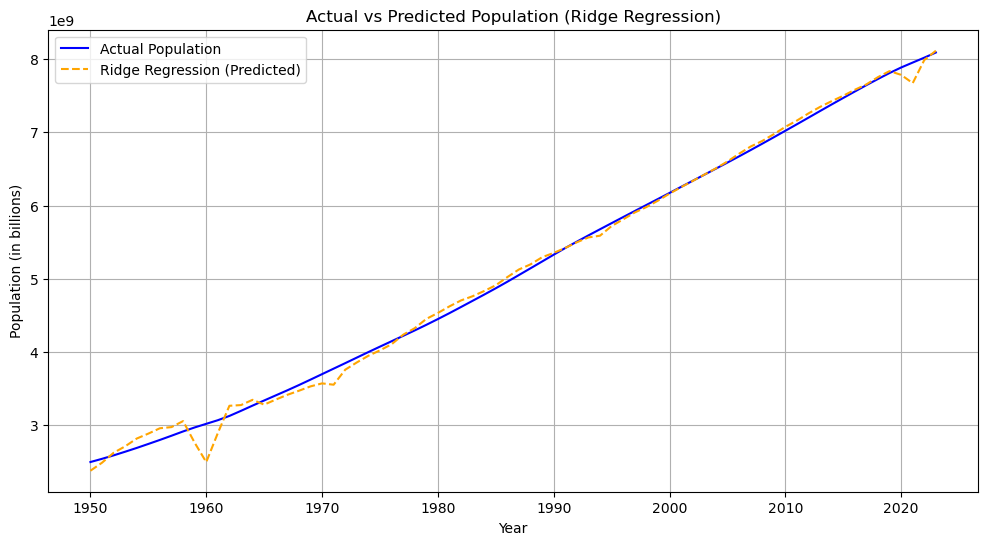

In [45]:
# Independent variables (features) and target variable for Ridge regression
X_ridge = dataWorld[['Life Expectancy', 'Median age', 'Fertility rate']]  # Features
y_ridge = dataWorld['Population']  # Target variable

# Split into training and testing sets for Ridge regression
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

# Fit the Ridge regression model
alpha = 0.1  # Regularization strength
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train_ridge, y_train_ridge)

# Make predictions
y_pred_ridge = model_ridge.predict(X_test_ridge)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test_ridge, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
r2_ridge = r2_score(y_test_ridge, y_pred_ridge)

# Add predicted population to the dataset
dataWorld['Predicted Population Ridge'] = model_ridge.predict(X_ridge)

# Plot actual vs predicted populations over time
plt.figure(figsize=(12, 6))
plt.plot(dataWorld['Year'], dataWorld['Population'], label='Actual Population', color='blue')
plt.plot(dataWorld['Year'], dataWorld['Predicted Population Ridge'], label='Ridge Regression (Predicted)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population (Ridge Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
print(f"Mean Absolute Error (MAE) for Rigg: {mae_ridge}")
print(f"Mean Squared Error (MSE) for Rigg: {mse_ridge}")
print(f"R-squared (R²) for Rigg : {r2_ridge}")
mse_scores["Ridge"]=mse_ridge

Mean Absolute Error (MAE) for Rigg: 111634167.41848488
Mean Squared Error (MSE) for Rigg: 2.7441507034717256e+16
R-squared (R²) for Rigg : 0.99225226760589


## Plotting MSE for different models

In [47]:
mse_scores

{'Linear': 3.661188187597609e+16,
 'ElasticNet': 3.7444708586990216e+16,
 'Lars': 2.728127938888548e+16,
 'Lasso': 2.728127950154707e+16,
 'Ridge': 2.7441507034717256e+16}

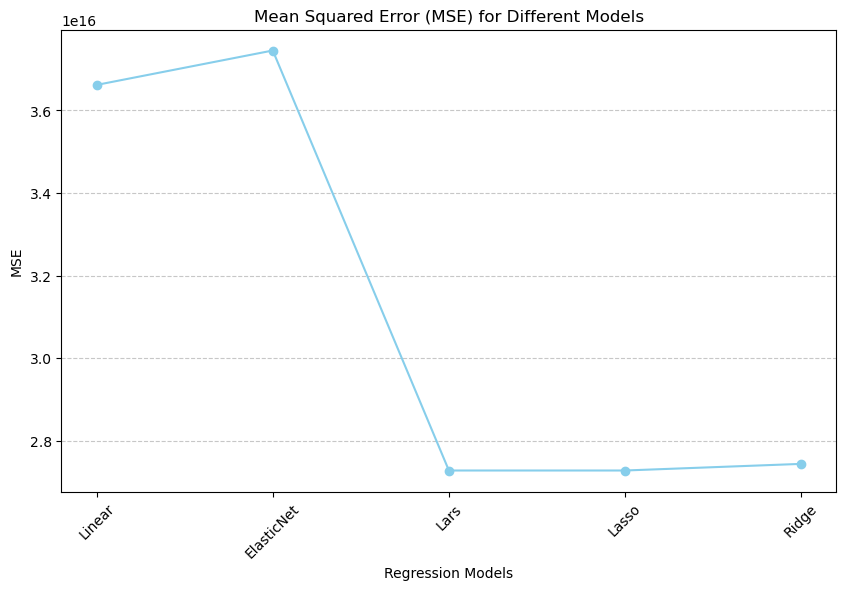

In [48]:
# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(list(mse_scores.keys()), list(mse_scores.values()), marker='o', linestyle='-', color='skyblue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### Inference from MSE Scores

The Mean Squared Error (MSE) scores for different models are as follows:

- **Linear Regression**: 3.661188187597616e+16
- **ElasticNet**: 3.744470858699016e+16
- **LARS**: 2.7281279388885852e+16
- **Lasso**: 2.728127950154722e+16
- **Ridge**: 2.744150703471724e+16

#### Key Inferences:

1. **LARS and Lasso**:
   - Both **LARS** and **Lasso** have the **lowest MSE** (2.7281e+16), indicating better performance in minimizing prediction error compared to other models.
   - These models utilize **L1 regularization**, which encourages sparsity by setting some coefficients to zero, potentially improving model generalization.

2. **Ridge**:
   - **Ridge Regression** has a slightly higher MSE (2.7441e+16) than **LARS** and **Lasso**, indicating that **L2 regularization** (which penalizes the squared coefficients) does not perform as well for this dataset. Still, it provides a reasonably good prediction.

3. **ElasticNet**:
   - **ElasticNet**, which combines **L1 and L2 regularization**, has the **second-highest MSE** (3.7445e+16). This suggests that the balance between Lasso and Ridge regularization may not be the most effective in this particular case, and a different combination of regularization strengths might yield better results.

4. **Linear Regression**:
   - **Linear Regression** without regularization shows the **highest MSE** (3.6612e+16), indicating that without regularization, the model is more prone to overfitting or underfitting, especially in high-dimensional or multicollinear datasets.

### Conclusion:
- **LARS** and **Lasso** outperform the other models in terms of minimizing MSE, suggesting that **L1 regularization** is the most effective for this dataset.
- **Ridge** and **ElasticNet** provide slightly worse predictions, indicating that **L2 regularization** or a combination of both regularizations may not be as effective in this case.
- **Linear Regression** without regularization is the least effective model, highlighting the importance of regularization in improving performance.


### Future years prediction

Exponential Decay Equation: y = 198940567729.7733 * exp(-0.0125 * x)


C:\Users\antv\AppData\Local\Temp\ipykernel_26444\1500232853.py:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


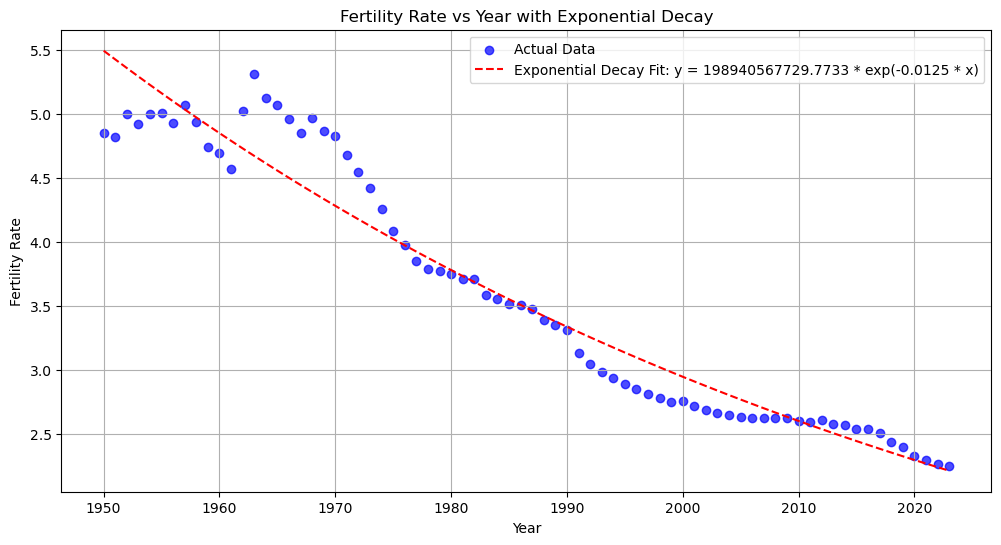

In [49]:
from scipy.optimize import curve_fit

# Extract Year and Fertility Rate columns
X = dataWorld['Year'].values
y = dataWorld['Fertility rate'].values

# Define the exponential decay function
def exponential_decay(x, a, b):
    return a * np.exp(b * x)

# Adjust the initial guesses for parameters a and b
initial_guess = (10, -0.01)  # Adjust these values
params, _ = curve_fit(exponential_decay, X, y, p0=initial_guess, maxfev=10000)
a, b = params

# Generate predictions
y_pred = exponential_decay(X, a, b)

# Print the Exponential Decay Equation
print(f"Exponential Decay Equation: y = {a:.4f} * exp({b:.4f} * x)")

# Plot the actual data and the exponential decay curve
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual Data', color='blue', alpha=0.7)
plt.plot(X, y_pred, label=f'Exponential Decay Fit: y = {a:.4f} * exp({b:.4f} * x)', color='red', linestyle='--')
plt.title('Fertility Rate vs Year with Exponential Decay')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.legend()
plt.grid(True)
plt.show()

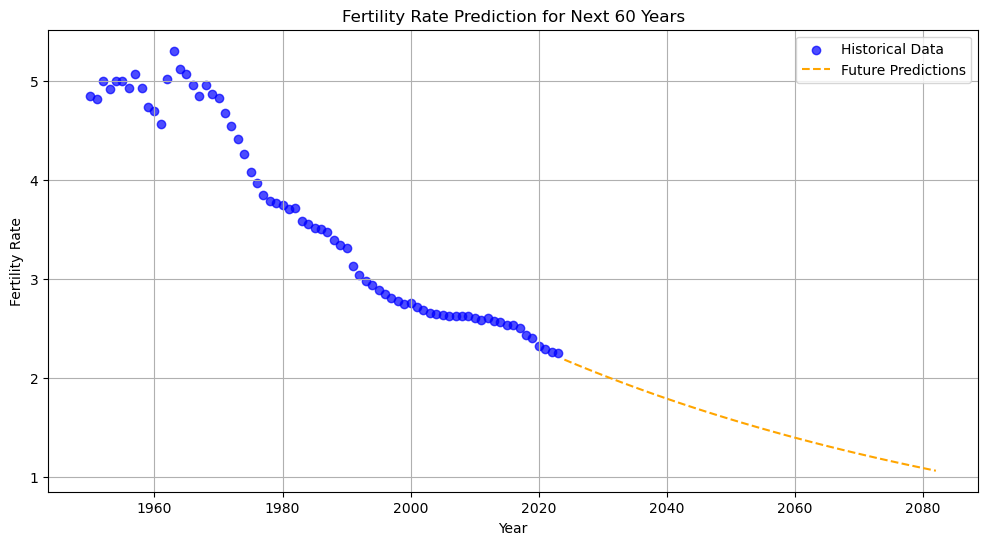

In [50]:
# Define the range for the next 10 years
current_year = dataWorld['Year'].max()
future_years = np.arange(current_year + 1, current_year + 60)

# Use the exponential decay equation to predict future values
future_fertility_rates = exponential_decay(future_years, a, b)

future_fertility_rates_array={}

for year, rate in zip(future_years, future_fertility_rates):
    future_fertility_rates_array[year]=rate

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.scatter(dataWorld['Year'], dataWorld['Fertility rate'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(future_years, future_fertility_rates, label='Future Predictions', color='orange', linestyle='--')
plt.title('Fertility Rate Prediction for Next 60 Years')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.legend()
plt.grid(True)
plt.show()


### Life Expectancy Prediction

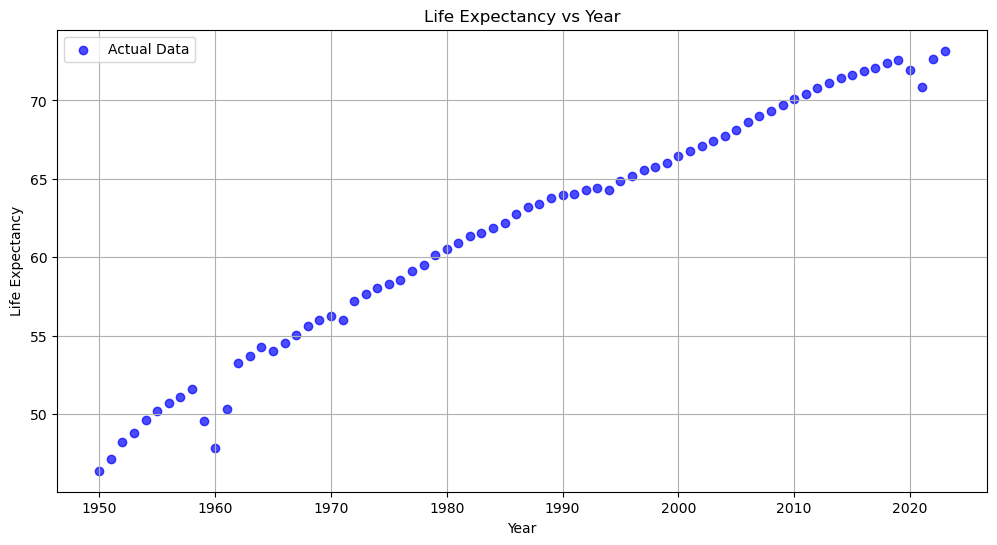

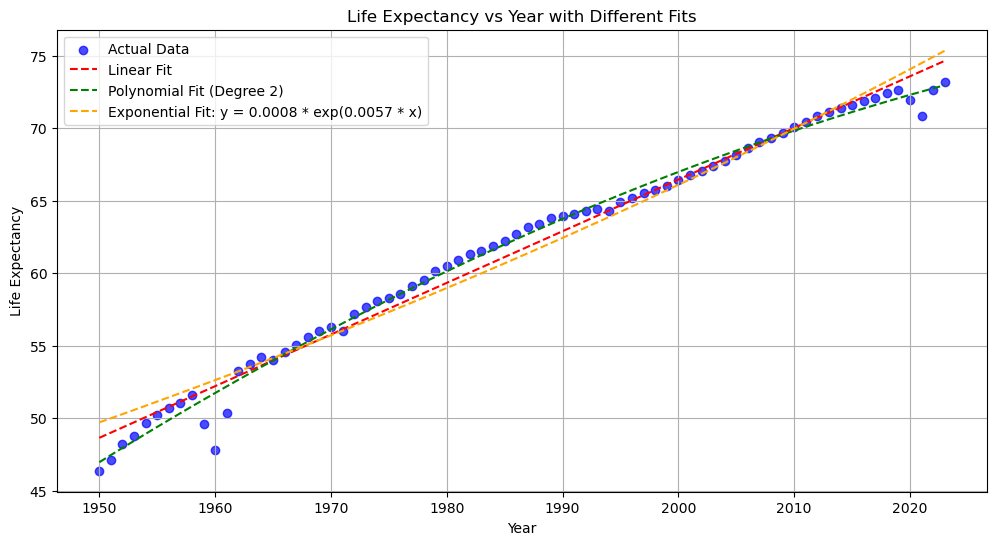

In [51]:
# Extract Year and Life Expectancy columns
X = dataWorld['Year'].values.reshape(-1, 1)
y = dataWorld['Life Expectancy'].values

# Visualization of Data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.7)
plt.title("Life Expectancy vs Year")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend()
plt.show()

# Linear Model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Polynomial Model (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Exponential Model
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_growth, X.flatten(), y, p0=(50, 0.001))
a, b = params
y_pred_exp = exponential_growth(X.flatten(), a, b)

# Plot all models
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.7)
plt.plot(X, y_pred_linear, label="Linear Fit", color="red", linestyle="--")
plt.plot(X, y_pred_poly, label="Polynomial Fit (Degree 2)", color="green", linestyle="--")
plt.plot(X, y_pred_exp, label=f"Exponential Fit: y = {a:.4f} * exp({b:.4f} * x)", color="orange", linestyle="--")
plt.title("Life Expectancy vs Year with Different Fits")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()


In [52]:
# Calculate R² and MSE for Linear Model
r2_linear = r2_score(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)

# Calculate R² and MSE for Polynomial Model
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

# Calculate R² and MSE for Exponential Model
r2_exp = r2_score(y, y_pred_exp)
mse_exp = mean_squared_error(y, y_pred_exp)

print("Linear Model: R² =", r2_linear, ", MSE =", mse_linear)
print("Polynomial Model (Degree 2): R² =", r2_poly, ", MSE =", mse_poly)
print("Exponential Model: R² =", r2_exp, ", MSE =", mse_exp)


Linear Model: R² = 0.980868968689207 , MSE = 1.12657579650649
Polynomial Model (Degree 2): R² = 0.9912725441883511 , MSE = 0.5139367722918686
Exponential Model: R² = 0.9670466885130456 , MSE = 1.9405332902778758


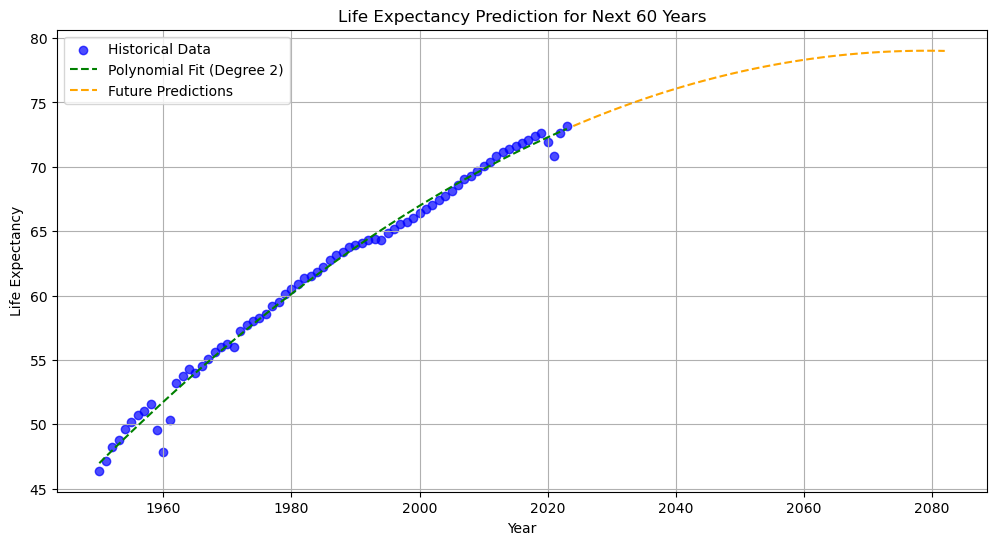

In [53]:
# Extract Year and Life Expectancy columns
X = dataWorld['Year'].values.reshape(-1, 1)
y = dataWorld['Life Expectancy'].values

# Fit Polynomial Regression Model (Degree 2)
degree = 2  # Adjust degree as needed
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict life expectancy for future years
current_year = dataWorld['Year'].max()
future_years = np.arange(current_year + 1, current_year + 60).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_life_expectancy = poly_model.predict(future_years_poly)

future_life_expectancy_array={}

for year, expectancy in zip(future_years.flatten(), future_life_expectancy):
    future_life_expectancy_array[year]=expectancy

# Visualize Historical Data and Future Predictions
plt.figure(figsize=(12, 6))
plt.scatter(dataWorld['Year'], dataWorld['Life Expectancy'], label='Historical Data', color='blue', alpha=0.7)
plt.plot(dataWorld['Year'], poly_model.predict(X_poly), label=f'Polynomial Fit (Degree {degree})', color='green', linestyle='--')
plt.plot(future_years, future_life_expectancy, label='Future Predictions', color='orange', linestyle='--')
plt.title('Life Expectancy Prediction for Next 60 Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


### Median age Prediction

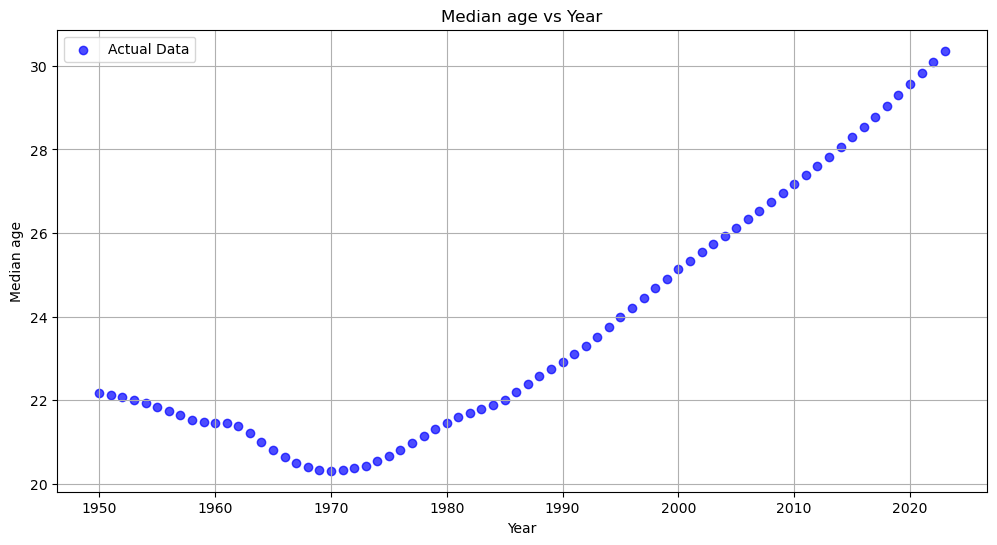

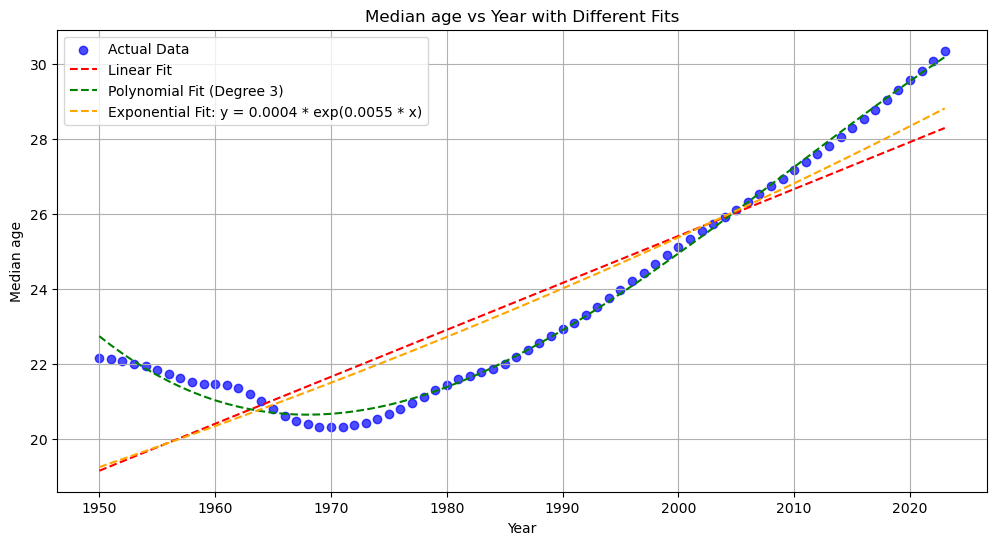

In [54]:
# Extract Year and Life Expectancy columns
X = dataWorld['Year'].values.reshape(-1, 1)
y = dataWorld['Median age'].values

# Visualization of Data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.7)
plt.title("Median age vs Year")
plt.xlabel("Year")
plt.ylabel("Median age")
plt.grid(True)
plt.legend()
plt.show()

# Linear Model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear_1 = linear_model.predict(X)

# Polynomial Model (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly_1 = poly_model.predict(X_poly)

# Exponential Model
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_growth, X.flatten(), y, p0=(50, 0.001))
a, b = params
y_pred_exp_1 = exponential_growth(X.flatten(), a, b)

# Plot all models
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.7)
plt.plot(X, y_pred_linear_1, label="Linear Fit", color="red", linestyle="--")
plt.plot(X, y_pred_poly_1, label="Polynomial Fit (Degree 3)", color="green", linestyle="--")
plt.plot(X, y_pred_exp_1, label=f"Exponential Fit: y = {a:.4f} * exp({b:.4f} * x)", color="orange", linestyle="--")
plt.title("Median age vs Year with Different Fits")
plt.xlabel("Year")
plt.ylabel("Median age")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
# Calculate R² and MSE for Linear Model
r2_linear = r2_score(y, y_pred_linear_1)
mse_linear = mean_squared_error(y, y_pred_linear_1)

# Calculate R² and MSE for Polynomial Model
r2_poly = r2_score(y, y_pred_poly_1)
mse_poly = mean_squared_error(y, y_pred_poly_1)

# Calculate R² and MSE for Exponential Model
r2_exp = r2_score(y, y_pred_exp_1)
mse_exp = mean_squared_error(y, y_pred_exp_1)

print("Linear Model: R² =", r2_linear, ", MSE =", mse_linear)
print("Polynomial Model (Degree 3): R² =", r2_poly, ", MSE =", mse_poly)
print("Exponential Model: R² =", r2_exp, ", MSE =", mse_exp)


Linear Model: R² = 0.7997674448190155 , MSE = 1.7942394825163852
Polynomial Model (Degree 3): R² = 0.9953022986946136 , MSE = 0.04209505867602052
Exponential Model: R² = 0.8374218887899318 , MSE = 1.4568263680318174


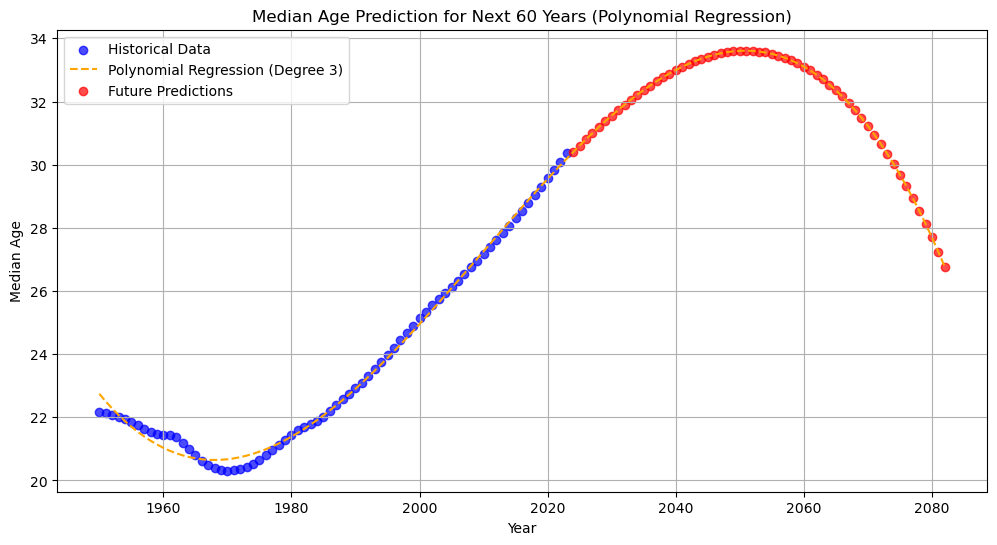

In [56]:
# Extract Year and Median Age columns
X = dataWorld['Year'].values.reshape(-1, 1)
y = dataWorld['Median age'].values

# Polynomial Regression with Degree 3
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Train the Polynomial Model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Generate predictions for historical data
y_pred = poly_model.predict(X_poly)

# Predict future values for the next 10 years
current_year = X.max()
future_years = np.arange(current_year + 1, current_year + 60).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_median_age = poly_model.predict(future_years_poly)

future_median_age_array={}
for year, age in zip(future_years.flatten(), future_median_age):
    future_median_age_array[year]=age

# Combine historical and future data for plotting
X_combined = np.vstack((X, future_years))
y_combined = np.concatenate((y_pred, future_median_age))

# Plot historical data and future predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Historical Data', color='blue', alpha=0.7)
plt.plot(X_combined, y_combined, label=f'Polynomial Regression (Degree {degree})', color='orange', linestyle='--')
plt.scatter(future_years, future_median_age, label='Future Predictions', color='red', alpha=0.7)
plt.title('Median Age Prediction for Next 60 Years (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
new_data = {
    'Year': list(future_fertility_rates_array.keys()),
    'Life Expectancy': list(future_life_expectancy_array.values()),
    'Median age': list(future_median_age_array.values()),
    'Fertility rate': list(future_fertility_rates_array.values()),
    'Population': [None] * len(future_life_expectancy_array),  # Populate with None for new rows, or you can add realistic values
    'Entity': ['World'] * len(future_life_expectancy_array)
}
new_df = pd.DataFrame(new_data)

# Append new rows to the existing DataFrame
dataWorldFuture = pd.concat([dataWorld, new_df], ignore_index=True)

# Drop the specified columns from dataWorldFuture
dataWorldFuture = dataWorldFuture.drop(columns=['Predicted Population ElasticNet',
                                                'Predicted Population LARS',
                                                'Predicted Population Lasso',
                                                'Predicted Population Ridge'])

C:\Users\antv\AppData\Local\Temp\ipykernel_26444\854586523.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataWorldFuture = pd.concat([dataWorld, new_df], ignore_index=True)


In [58]:
dataWorldFuture

,Entity,Year,Life Expectancy,Median age,Fertility rate,Population,Predicted Population
0,World,1950,46.394400,22.159000,4.852000,2.493093e+09,2.830944e+09
1,World,1951,47.125900,22.123000,4.816000,2.536927e+09,2.907173e+09
2,World,1952,48.218300,22.074000,5.001000,2.584086e+09,2.841105e+09
3,World,1953,48.809000,22.011000,4.922000,2.634106e+09,2.935711e+09
4,World,1954,49.651400,21.937000,4.998000,2.685895e+09,2.930151e+09
...,...,...,...,...,...,...,...
128,World,2078,79.017641,28.546671,1.113417,NaN,NaN
129,World,2079,79.020435,28.130319,1.099621,NaN,NaN
130,World,2080,79.019392,27.694983,1.085996,NaN,NaN
131,World,2081,79.014512,27.240389,1.072540,NaN,NaN


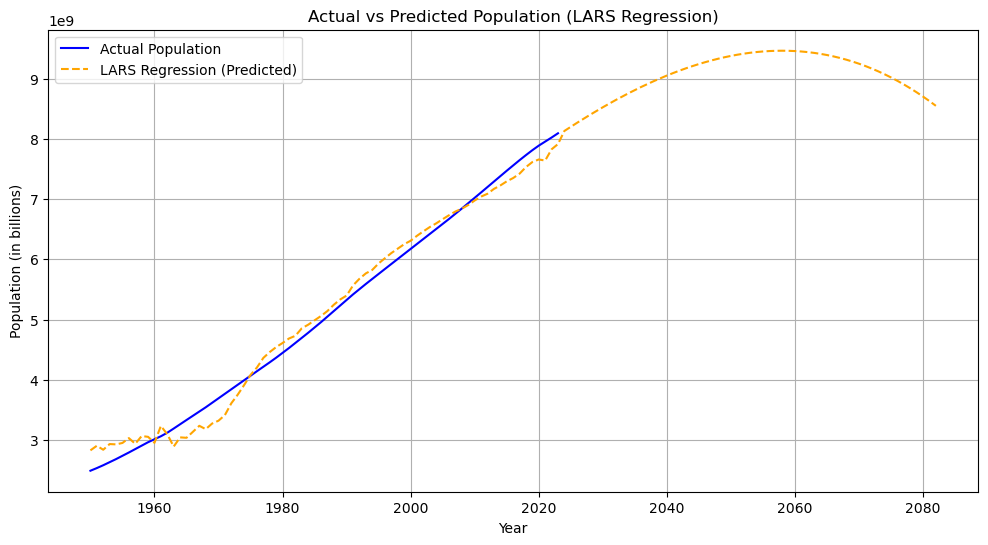

In [59]:
# Independent variables (features) and target variable
filtered_data = dataWorldFuture[(dataWorldFuture['Year'] >= 2024) & (dataWorldFuture['Year'] <= 2123)]
X_filtered = filtered_data[['Life Expectancy', 'Median age', 'Fertility rate']]
y = dataWorldFuture['Population']

# Add predicted population to the dataset
predicted_population = model_lars.predict(X_filtered)

dataWorldFuture.loc[(dataWorldFuture['Year'] >= 2024) & (dataWorldFuture['Year'] <= 2123), 'Predicted Population'] = predicted_population

# Plot actual vs predicted populations over time
plt.figure(figsize=(12, 6))
plt.plot(dataWorldFuture['Year'], dataWorldFuture['Population'], label='Actual Population', color='blue')
plt.plot(dataWorldFuture['Year'], dataWorldFuture['Predicted Population'], label='LARS Regression (Predicted)', color='orange', linestyle='--')
plt.title('Actual vs Predicted Population (LARS Regression)')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
The graph demonstrates the **Actual Population** (blue line) compared to the **Predicted Population** (orange dashed line) using LARS Regression over time. Here's the key inference:

1. **Historical Fit**:
   - From earlier years (e.g., 1960s to early 2000s), the predicted population closely follows the actual population, indicating a strong model fit in this historical period.

2. **Predictions Beyond the Present**:
   - From 2024 onwards, the orange line extends into future predictions. It shows a continued population rise until a peak and then a slight decline. This suggests that the model predicts population growth will slow down and eventually plateau or decrease slightly.

3. **Deviations**:
   - There are minor deviations between the actual and predicted values in certain periods (e.g., before 2020). These discrepancies might result from unaccounted variables or model limitations.

4. **General Trend**:
   - The LARS regression successfully captures the overall upward trend in global population growth and offers reasonable long-term predictions.

5. **Model Confidence**:
   - As future predictions extend, deviations from actual population trends may increase due to unforeseen factors (e.g., economic shifts, policies, pandemics). Hence, predictions beyond 2024 should be interpreted cautiously.

This graph emphasizes the importance of analyzing trends and considering external variables for long-term forecasting.

How to Avoid this ??

**Make Babies!!!** 
Increase in fertility rate will Stop this decline and we might not become extinct 


<img src="simpson_2.jpeg" alt="Happy Family" title="Happy Family" width="600" />

### References

1. **Population Growth**: Our World in Data. [Population Growth](https://ourworldindata.org/population-growth)
2. **Median Age vs. Births per Woman**: Our World in Data. [Median Age vs Births per Woman](https://ourworldindata.org/grapher/median-age-vs-births-per-woman)
3. **Life Expectancy**: Our World in Data. [Life Expectancy](https://ourworldindata.org/life-expectancy)
